In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

recentdate=session.query(func.max(Measurement.date)).first()
recentdate

('2017-08-23')

In [10]:
p=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').all()

datePrcp_df=pd.DataFrame(data=p,columns=["date","prcp"])
dategroupPrcp=datePrcp_df.groupby(["date"]).mean()
dategroupPrcp=dategroupPrcp.reset_index()
dategroupPrcp=dategroupPrcp.sort_values(by="date",ascending=True)

dategroupPrcp.to_csv("outputs/average_prcp.csv",
                  encoding="utf-8", index=False, header=True)



dategroupPrcp

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
...,...,...
361,2017-08-19,0.030000
362,2017-08-20,0.005000
363,2017-08-21,0.193333
364,2017-08-22,0.166667


In [11]:
listDate=dategroupPrcp["date"].tolist()
listPrcp=dategroupPrcp["prcp"].tolist()

In [12]:
dateList=dategroupPrcp["date"].tolist()
ex_dt=[]
for dt in range(0,len(dateList)):
    if dt%15==0:
        ex_dt.append(dateList[dt])

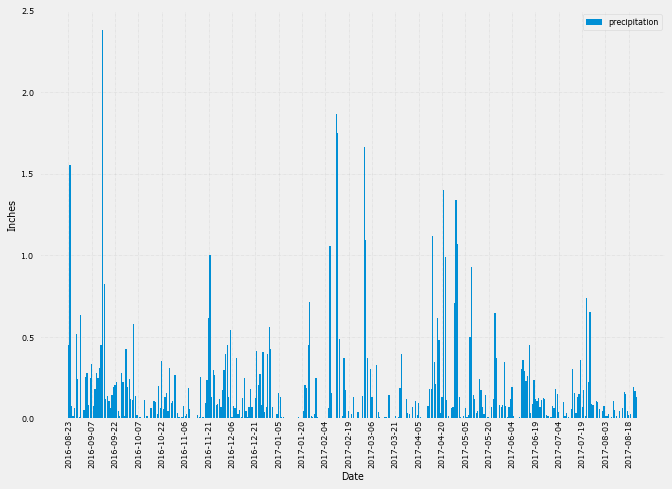

In [13]:
#plt.figure()
#plt.plot(listDate,listPrcp)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
rcParams['font.size'] = 8

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(listDate, listPrcp, label="precipitation")
plt.legend(loc="upper right")
plt.xlabel("Date")
plt.ylabel("Inches")
ax.xaxis.set_tick_params(pad=1)
ax.yaxis.set_tick_params(pad=5)
plt.xticks(ex_dt, rotation='vertical')
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5])
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
#plt.grid(True, linewidth= 1, linestyle="--")


plt.show()